In [19]:
# 성능 평가지표 얻는 함수 사전 정의
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

# XGBoost - python wrapper

In [2]:
import xgboost as xgb
# feature별 중요도 출력하기 위한 라이브러리
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

dataset = load_breast_cancer()
x_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=x_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_features,
                                                   y_label,
                                                   test_size=0.2,
                                                   random_state=42)

# Python Wrapper용 XGBoost는 DMatrix로 변환을 시켜주고 학습시켜주어야 함!
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)

# 하이퍼 파라미터 설정
params = {'max_depth':3,
         'eta':0.1,#eta=learning_rate
         'objective':'binary:logistic',
         'eval_metric':'logloss',
         'early_stopping':100
         }
# 약한 분류기 개수들인 n_estimators와 동일(몇 번 반복할건지)
num_rounds = 400

# train 데이터셋, test 데이터셋 각각 명기해주기 -> 학습시 evals인자에 들어감.
wlist = [(dtrain, 'train'), (dtest, 'test')]
# 하이퍼파라미터와 early_stopping인자 추가해주어서 XGBoost모델 학습시키기
xgb_model = xgb.train(params=params, dtrain=dtrain,
                     num_boost_round=num_rounds,
                     evals=wlist)

[0]	train-logloss:0.609607	test-logloss:0.614431
[1]	train-logloss:0.540756	test-logloss:0.547207
[2]	train-logloss:0.484074	test-logloss:0.495586
[3]	train-logloss:0.433242	test-logloss:0.446594
[4]	train-logloss:0.389846	test-logloss:0.406819
[5]	train-logloss:0.352125	test-logloss:0.370823
[6]	train-logloss:0.319491	test-logloss:0.340322
[7]	train-logloss:0.291385	test-logloss:0.315586
[8]	train-logloss:0.266062	test-logloss:0.291813
[9]	train-logloss:0.243922	test-logloss:0.27323
[10]	train-logloss:0.224081	test-logloss:0.254899
[11]	train-logloss:0.206975	test-logloss:0.242168
[12]	train-logloss:0.191283	test-logloss:0.225769
[13]	train-logloss:0.177047	test-logloss:0.212827
[14]	train-logloss:0.16451	test-logloss:0.199469
[15]	train-logloss:0.153192	test-logloss:0.191687
[16]	train-logloss:0.14312	test-logloss:0.180686
[17]	train-logloss:0.134096	test-logloss:0.174324
[18]	train-logloss:0.125223	test-logloss:0.165734
[19]	train-logloss:0.116873	test-logloss:0.155169
[20]	train-lo

[164]	train-logloss:0.007303	test-logloss:0.098489
[165]	train-logloss:0.007284	test-logloss:0.098509
[166]	train-logloss:0.007265	test-logloss:0.098593
[167]	train-logloss:0.007246	test-logloss:0.098151
[168]	train-logloss:0.007213	test-logloss:0.097935
[169]	train-logloss:0.007195	test-logloss:0.098088
[170]	train-logloss:0.007176	test-logloss:0.097977
[171]	train-logloss:0.007158	test-logloss:0.097668
[172]	train-logloss:0.00714	test-logloss:0.097626
[173]	train-logloss:0.007122	test-logloss:0.097521
[174]	train-logloss:0.007104	test-logloss:0.097603
[175]	train-logloss:0.007085	test-logloss:0.097494
[176]	train-logloss:0.007068	test-logloss:0.097257
[177]	train-logloss:0.007051	test-logloss:0.097408
[178]	train-logloss:0.007033	test-logloss:0.097302
[179]	train-logloss:0.007016	test-logloss:0.096887
[180]	train-logloss:0.006999	test-logloss:0.09697
[181]	train-logloss:0.006981	test-logloss:0.096866
[182]	train-logloss:0.006965	test-logloss:0.096877
[183]	train-logloss:0.006948	test

[326]	train-logloss:0.00546	test-logloss:0.092249
[327]	train-logloss:0.005454	test-logloss:0.092343
[328]	train-logloss:0.005448	test-logloss:0.092236
[329]	train-logloss:0.005441	test-logloss:0.092234
[330]	train-logloss:0.005435	test-logloss:0.092237
[331]	train-logloss:0.005429	test-logloss:0.092221
[332]	train-logloss:0.005423	test-logloss:0.091984
[333]	train-logloss:0.005417	test-logloss:0.092077
[334]	train-logloss:0.00541	test-logloss:0.091971
[335]	train-logloss:0.005404	test-logloss:0.09197
[336]	train-logloss:0.005399	test-logloss:0.091867
[337]	train-logloss:0.005392	test-logloss:0.09196
[338]	train-logloss:0.005387	test-logloss:0.091964
[339]	train-logloss:0.005381	test-logloss:0.091862
[340]	train-logloss:0.005375	test-logloss:0.091954
[341]	train-logloss:0.005369	test-logloss:0.091823
[342]	train-logloss:0.005364	test-logloss:0.091809
[343]	train-logloss:0.005358	test-logloss:0.09183
[344]	train-logloss:0.005352	test-logloss:0.091728
[345]	train-logloss:0.005346	test-lo

In [10]:
# predict를 통해서 예측값 반환
# Python Wrapper용 XGBoost는 predict하면 해당 label로 될 확률을 반환!
# 즉 각 데이터에 대해 하나의 확률만 반환해줌
# 예측할 때도 DMatrix형태로 넣어주어야함
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10],3))
print()
print("위 확률결과값들을 0.5보다 크면 1, 작으면 0으로 반환해 재출력")
pred_labels = [1 if x > 0.5 else 0 for x in pred_probs]
print(pred_labels[:10])

[0.995 0.    0.    1.    1.    0.    0.001 0.065 0.346 1.   ]

위 확률결과값들을 0.5보다 크면 1, 작으면 0으로 반환해 재출력
[1, 0, 0, 1, 1, 0, 0, 0, 0, 1]


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 -> Positive로 될 확률값들을 인자로 해주어야함!
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [12]:
# 평가 점수 출력시에는 DMatrix 이전 상태인 일반 array형태로 넣어주기
get_clf_eval(y_test, pred_labels, pred_probs)

오차 행렬
[[41  2]
 [ 1 70]]
정확도: 0.9737, 정밀도: 0.9722, 재현율: 0.9859,    F1: 0.9790, AUC:0.9941


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

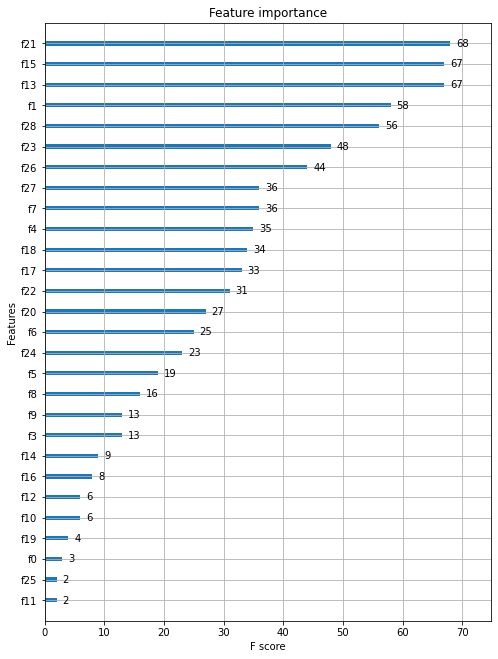

In [13]:
# feature별 중요도 시각화
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,11))
# 인자로 학습시킨 모델과 축을 넣어주자
plot_importance(xgb_model, ax)

# XGBoost - Scikit-learn wrapper

In [14]:
from xgboost import XGBClassifier

# 원래 여기 데이터에는 검증 데이터를 넣어야함 Test 데이터 넣으면 안됨!
# 검증 데이터 넣어주어서 교차검증 해보도록하기
evals = [(x_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1,
                           max_depth=3)
# eval_metric넣어주면서 검증 데이터로 loss 측정할 때 사용할 metric 지정
xgb_wrapper.fit(x_train, y_train, early_stopping_rounds=200,
               eval_set=evals, eval_metric='logloss')

preds = xgb_wrapper.predict(x_test)
preds_proba = xgb_wrapper.predict_proba(x_test)[:, 1]
print(preds_proba[:10])

[0]	validation_0-logloss:0.614431
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.547208
[2]	validation_0-logloss:0.495585
[3]	validation_0-logloss:0.446594
[4]	validation_0-logloss:0.406818
[5]	validation_0-logloss:0.370823
[6]	validation_0-logloss:0.340322
[7]	validation_0-logloss:0.315586
[8]	validation_0-logloss:0.291813
[9]	validation_0-logloss:0.27323
[10]	validation_0-logloss:0.2549
[11]	validation_0-logloss:0.242168
[12]	validation_0-logloss:0.225769
[13]	validation_0-logloss:0.212827
[14]	validation_0-logloss:0.199469
[15]	validation_0-logloss:0.191686
[16]	validation_0-logloss:0.180686
[17]	validation_0-logloss:0.174324
[18]	validation_0-logloss:0.165735
[19]	validation_0-logloss:0.155169
[20]	validation_0-logloss:0.15131
[21]	validation_0-logloss:0.142974
[22]	validation_0-logloss:0.140384
[23]	validation_0-logloss:0.136592
[24]	validation_0-logloss:0.131529
[25]	validation_0-logloss:0.128853
[26]	validation_0-logloss:0.124978


[230]	validation_0-logloss:0.094704
[231]	validation_0-logloss:0.094724
[232]	validation_0-logloss:0.094537
[233]	validation_0-logloss:0.094569
[234]	validation_0-logloss:0.094693
[235]	validation_0-logloss:0.094718
[236]	validation_0-logloss:0.094688
[237]	validation_0-logloss:0.094709
[238]	validation_0-logloss:0.094721
[239]	validation_0-logloss:0.09454
[240]	validation_0-logloss:0.094561
[241]	validation_0-logloss:0.094593
[242]	validation_0-logloss:0.094616
[243]	validation_0-logloss:0.094292
[244]	validation_0-logloss:0.094414
[245]	validation_0-logloss:0.094275
[246]	validation_0-logloss:0.094394
[247]	validation_0-logloss:0.094416
[248]	validation_0-logloss:0.094389
[249]	validation_0-logloss:0.094098
[250]	validation_0-logloss:0.094119
[251]	validation_0-logloss:0.09413
[252]	validation_0-logloss:0.093959
[253]	validation_0-logloss:0.094076
[254]	validation_0-logloss:0.093938
[255]	validation_0-logloss:0.093971
[256]	validation_0-logloss:0.093993
[257]	validation_0-logloss:0.0

In [16]:
get_clf_eval(y_test, preds, preds_proba)

오차 행렬
[[41  2]
 [ 1 70]]
정확도: 0.9737, 정밀도: 0.9722, 재현율: 0.9859,    F1: 0.9790, AUC:0.9941


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

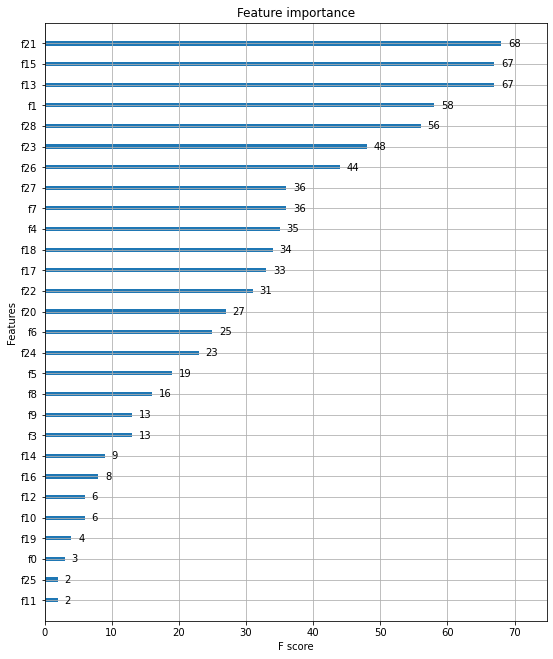

In [17]:
# feature별 중요도 시각화하기
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(9,11))
plot_importance(xgb_wrapper, ax)

# LightGBM - Scikit-learn wrapper

- Python wrapper용도 있지만 해당 강의에서는 예시 생략

In [18]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
x_features = dataset.data
y_labels = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x_features,
                                                   y_labels,
                                                   test_size=0.2,
                                                   random_state=42)

lgbm_wrapper = LGBMClassifier(n_estimators=200)

#검증 데이터 할당(Test데이터 사용했지만 실제로는 Test데이터 사용하면 치팅임)
evals = [(x_test, y_test)]
lgbm_wrapper.fit(x_train, y_train, early_stopping_rounds=100,
                eval_set=evals, eval_metric='logloss',
                verbose=True)
#예측값 할당
preds = lgbm_wrapper.predict(x_test)
#예측값 확률 할당
preds_proba = lgbm_wrapper.predict_proba(x_test)[:,1]

[1]	valid_0's binary_logloss: 0.587533
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.52449
[3]	valid_0's binary_logloss: 0.472657
[4]	valid_0's binary_logloss: 0.432004
[5]	valid_0's binary_logloss: 0.391511
[6]	valid_0's binary_logloss: 0.357212
[7]	valid_0's binary_logloss: 0.329036
[8]	valid_0's binary_logloss: 0.302392
[9]	valid_0's binary_logloss: 0.281315
[10]	valid_0's binary_logloss: 0.26363
[11]	valid_0's binary_logloss: 0.247288
[12]	valid_0's binary_logloss: 0.228944
[13]	valid_0's binary_logloss: 0.216059
[14]	valid_0's binary_logloss: 0.20322
[15]	valid_0's binary_logloss: 0.191265
[16]	valid_0's binary_logloss: 0.183542
[17]	valid_0's binary_logloss: 0.176734
[18]	valid_0's binary_logloss: 0.169192
[19]	valid_0's binary_logloss: 0.163594
[20]	valid_0's binary_logloss: 0.15889
[21]	valid_0's binary_logloss: 0.15117
[22]	valid_0's binary_logloss: 0.145575
[23]	valid_0's binary_logloss: 0.14345
[24]	valid_0's binary_logloss: 0.

In [20]:
get_clf_eval(y_test, preds, preds_proba)

오차 행렬
[[41  2]
 [ 2 69]]
정확도: 0.9649, 정밀도: 0.9718, 재현율: 0.9718,    F1: 0.9718, AUC:0.9928


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

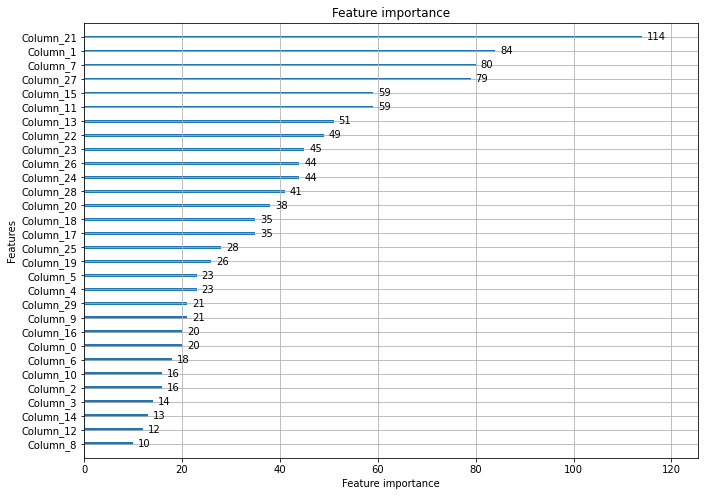

In [21]:
# LightGBM도 feature Importance출력할 수 있는 라이브러리 제공해주고 있음
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11,8))
plot_importance(lgbm_wrapper, ax)